<a href="https://colab.research.google.com/github/carlossoto362/QLS2021-2022Diploma/blob/main/BiologyHomwork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biophysics Homework II (2021-2022)/Programing part
Here are the python procedures used to made the Biophysics Homework II (2021-2022). 

##Problem 1: Active Brownian particles
The idea is to use the Euler scheme numerical integration to solve the system 
\begin{equation}
\begin{aligned}
    &\dot{\theta}=\omega + \sqrt{2D_r} \xi_\theta \\
    &\dot{x} = v\cos{\theta} + \sqrt{2D_t} \xi_x\\
    &\dot{y} = v\sin{\theta} + \sqrt{2D_t} \xi_y,
\end{aligned}
\end{equation}

In [ ]:
from sympy.printing.latex import print_latex
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import random
from scipy import stats
sy.init_session()
%matplotlib inline

IPython console for SymPy 1.7.1 (Python 3.7.12-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



##Drowing the paths 1
In this part, using the equations of motion with Ito's interpretation, we estimate the paths of the system, using $D_t = 0.2, D_r = 0.17, v = 30, w = 10$, for a duration of 10 seconds, and a time step $\delta t=0.01$.


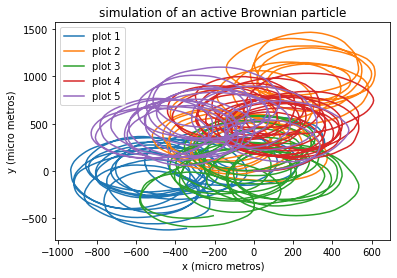

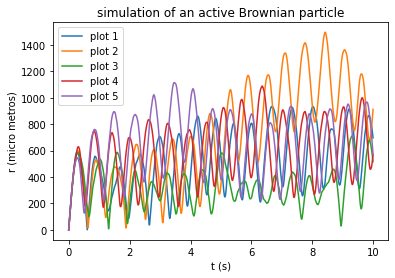

In [ ]:
#defining the initial conditions, and the functions
np.random.seed(2777)

dt = 0.01

n = int(10/dt)

Dt = 0.2
Dr = 0.17
v = 30
w = 10
x = np.zeros((n,5))
y = np.zeros((n,5))
theta = np.zeros((n,5))
t = np.arange(n)*dt
for j in range(5):
  for i in range(n-1):
    theta[i+1,j] = theta[i,j] + w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
    x[i+1,j] = x[i,j] + v*np.cos(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))
    y[i+1,j] = y[i,j] + v*np.sin(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))

plt.title("simulation of an active Brownian particle")
plt.xlabel("x (micro metros)")
plt.ylabel("y (micro metros)")
for i in range(5): 
  plt.plot(x[:,i],y[:,i],label="plot "+str(i+1))
plt.legend()
plt.show()
plt.title("simulation of an active Brownian particle")
plt.xlabel("t (s)")
plt.ylabel("r (micro metros)")
for i in range(5):  
  plt.plot(t,np.sqrt(x[:,i]*x[:,i] + y[:,i]*y[:,i]),label="plot "+str(i+1))
plt.legend()
plt.show()


##Drowing the paths 2
In this part, using the equations of motion with Ito's interpretation, we estimate the paths of the system, using $D_t = 0.2, D_r = 0.17, v = 30, w = 0$, for a duration of 10 seconds, and a time step $\delta t=0.01$.

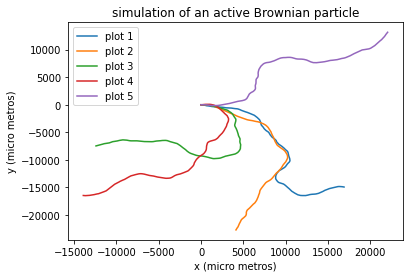

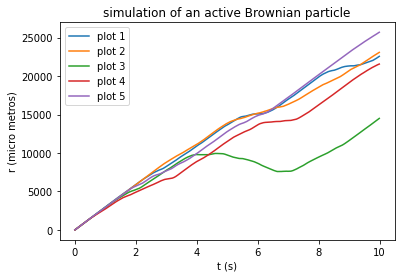

In [ ]:
w = 0
x = np.zeros((n,5))
y = np.zeros((n,5))
theta = np.zeros((n,5))
t = np.arange(n)*dt
for j in range(5):
  for i in range(n-1):
    theta[i+1,j] = theta[i,j] + w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
    x[i+1,j] = x[i,j] + v*np.cos(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))
    y[i+1,j] = y[i,j] + v*np.sin(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))

plt.title("simulation of an active Brownian particle")
plt.xlabel("x (micro metros)")
plt.ylabel("y (micro metros)")
for i in range(5):  
  plt.plot(x[:,i],y[:,i],label="plot "+str(i+1))
plt.legend()
plt.show()
plt.title("simulation of an active Brownian particle")
plt.xlabel("t (s)")
plt.ylabel("r (micro metros)")
for i in range(5):  
  plt.plot(t,np.sqrt(x[:,i]*x[:,i] + y[:,i]*y[:,i]),label="plot "+str(i+1))
plt.legend()
plt.show()

##Comparing theoretical result with simulation 1
In this part, using the equations of motion with Ito's interpretation, we estimate the value of the angle $\theta$, using Dt=0.2,Dr=0.17,v=30,w=10, after 1 second, using a time step δt=0.001s. We did this for 1000 realizations, plot the histogram of the angle and compared it with the theoretical result. We also found the Kolmogorov–Smirnov statistic of the histogram and the theoretical distribution. The theoretical result was a gaussian with mean $wt$ and standard deviation $2D_rt$.

In [ ]:
#geting the probability distribution of theta

dt = 0.001
n = int(1/dt)
Dt = 0.2
Dr = 0.17
v = 30
w = 10
thetas = np.zeros(10**3)
for j in range(10**3):
  theta = 0
  for i in range(n-1):
      theta += w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
  thetas[j] = theta
def teoreticalDensity(theta,t):
  return np.exp( -((theta - w*t)**2)/(4*Dr*t)   )/(np.sqrt(4*np.pi*Dr*t))
thetasT = np.zeros(200)
ts = np.arange(200)*(18/200)
for i in range(200):
  thetasT[i] = teoreticalDensity(ts[i],1)


In [ ]:
#defining the Kolmogorov–Smirnov statistic
print(stats.kstest((thetas -w*1)/np.sqrt(2*Dr*1),'norm' ))
print("critical value for alpha = 0.05: ", 1.36/np.sqrt(1000))

KstestResult(statistic=0.017035058967790395, pvalue=0.9337131948525057)
critical value:  0.04300697617828996


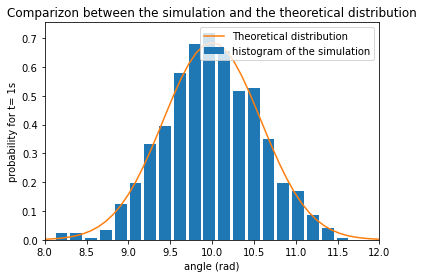

In [ ]:

plt.title("Comparizon between the simulation and the theoretical distribution")
plt.hist(thetas, density = True, rwidth=0.8, bins=20, label="histogram of the simulation")
plt.plot(ts,thetasT,label="Theoretical distribution")
plt.xlabel("angle (rad)")
plt.ylabel("probability for t= 1s")
plt.xlim([8,12])
plt.legend()
plt.show()

##Comparing theoretical result with simulation 2
In this part, using the equations of motion with Ito's interpretation, we estimate the value of the angle $\theta$, using Dt=0.2,Dr=0.17,v=30,w=10, after 5 seconds, using a time step δt=0.001s. We did this for 1000 realizations, plot the histogram of the angle and compared it with the theoretical result. We also found the Kolmogorov–Smirnov statistic of the histogram and the theoretical distribution. The theoretical result was a gaussian with mean $wt$ and standard deviation $2D_rt$.

In [ ]:
dt = 0.001
n = int(5/dt)
Dt = 0.2
Dr = 0.17
v = 30
w = 10
thetas = np.zeros(10**3)
for j in range(10**3):
  theta = 0
  for i in range(n-1):
      theta += w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
  thetas[j] = theta
thetasT = np.zeros(1000)
ts = np.arange(1000)*(60/1000)
for i in range(1000):
  thetasT[i] = teoreticalDensity(ts[i],5)


In [ ]:
#defining the Kolmogorov–Smirnov statistic
thetasSample=np.random.normal(loc=w*5,scale=np.sqrt(2*Dr*5),size=1000)
print(stats.kstest((thetas -w*5)/np.sqrt(2*Dr*5),'norm' ))
print("critical value for alpha = 0.05: ", 1.36/np.sqrt(1000))

KstestResult(statistic=0.02660903690351657, pvalue=0.47683550095021593)
critical value:  0.04300697617828996


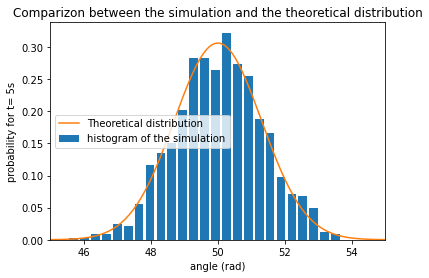

In [ ]:
plt.title("Comparizon between the simulation and the theoretical distribution")
plt.hist(thetas, density = True, rwidth=0.8, bins=25, label="histogram of the simulation")
plt.plot(ts,thetasT,label="Theoretical distribution")
plt.xlabel("angle (rad)")
plt.ylabel("probability for t= 5s")
plt.xlim([45,55])
plt.legend()
plt.show()

##Comparing theoretical result with simulation 3
In this part, using the equations of motion with Ito's interpretation, we estimate the value of the angle $\theta$, using Dt=0.2,Dr=0.17,v=30,w=10, after 10 seconds, using a time step δt=0.001s. We did this for 1000 realizations, plot the histogram of the angle and compared it with the theoretical result. We also found the Kolmogorov–Smirnov statistic of the histogram and the theoretical distribution. The theoretical result was a gaussian with mean $wt$ and standard deviation $2D_rt$.

In [ ]:
dt = 0.001
n = int(10/dt)
Dt = 0.2
Dr = 0.17
v = 30
w = 10
thetas = np.zeros(10**3)
for j in range(10**3):
  theta = 0
  for i in range(n-1):
      theta += w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
  thetas[j] = theta
thetasT = np.zeros(1000)
ts = np.arange(1000)*(120/1000)
for i in range(1000):
  thetasT[i] = teoreticalDensity(ts[i],10)




In [ ]:
#defining the Kolmogorov–Smirnov statistic
thetasSample=np.random.normal(loc=w*10,scale=np.sqrt(2*Dr*10),size=1000)
print(stats.kstest((thetas -w*10)/np.sqrt(2*Dr*10),'norm' ))
print("critical value for alpha=0.1: ", 1.22/np.sqrt(1000))

KstestResult(statistic=0.015992955366681882, pvalue=0.960153526737808)
critical value for alpha=0.1:  0.03857978745405423


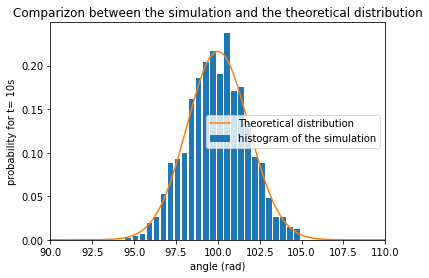

In [ ]:
plt.title("Comparizon between the simulation and the theoretical distribution")
plt.hist(thetas, density = True, rwidth=0.8, bins=25, label="histogram of the simulation")
plt.plot(ts,thetasT,label="Theoretical distribution")
plt.xlabel("angle (rad)")
plt.ylabel("probability for t= 10s")
plt.xlim([90,110])
plt.legend()
plt.show()

#Problem 3: Statistics of enzymatic reactions
In this section we solve a three-state continuous-time Markov jump model of the cyclic enzymatic reaction with the posible states $E, ES, EP$, and transition rates $k_+, k_-$, clock wise and anti clock wise respectively. 



##Exact solution:
For the exact solution, we found the eigenvalues and eigenvectors of the transition matrix. Then, we wrote the exact solution as 
\begin{equation}
    {P}(t) =  S D S^{-1} {P}(0)
\end{equation}
Where $D$ is the diagonaliced matrix, S the matrix form by the eigenvectors, and $P(0)$ the initial probability distribution. 
In the last part of this section is the solution for the probability distribution after 3 seconds, using $k_+ = 10$ and $k_-=1$.

In [ ]:
#defining the elemets of the master equation
PE,PES,PEP,kmas,kmen,gamma, lamda,t = sy.symbols('PS PES PEP kmas kmen gamma lamda t',real=True)
lambda1,lambda2,lambda3,v1,v2,v3= sy.symbols('lambda1 lambda2 lambda3 v1 v2 v3')

matrix = sy.Matrix([[-gamma, kmen,kmas],[kmas,-gamma,kmen],[kmen,kmas,-gamma]])

In [ ]:
#finding the determinant, the eigenvectors and eigenvalues
identidad = sy.eye(3)
det = sy.collect((matrix-lamda*identidad).det(), (lamda**3,lamda**2,lamda))
pprint(det)
P = matrix.diagonalize()

v = []
l = []
for i in range(3):
  l.append(sy.simplify(sy.re(P[1][i,i])) + I*sy.simplify(sy.im(P[1][i,i])))
  v.append(sy.Matrix([sy.simplify(sy.re(P[0][i,0])) + I*sy.simplify(im(P[0][i,0])), sy.simplify(sy.re(P[0][i,1])) + I*sy.simplify(im(P[0][i,1])),sy.simplify(sy.re(P[0][i,2])) + I*sy.simplify(im(P[0][i,2]))]))

v1 = v[2]
v2 = v[1]
v3 = v[0]
lambda1 = l[0]
lambda2 = l[1]
lambda3 = l[2]
pprint(lambda1)
pprint(lambda2)
pprint(lambda3)
pprint(v1)
pprint(v2)
pprint(v3)



   3                        2       3       3    3     ⎛     2              ⎞
- γ  + 3⋅γ⋅kmas⋅kmen - 3⋅γ⋅λ  + kmas  + kmen  - λ  + λ⋅⎝- 3⋅γ  + 3⋅kmas⋅kmen⎠
-γ + kmas + kmen
     kmas   kmen   √3⋅ⅈ⋅(-kmas + kmen)
-γ - ──── - ──── + ───────────────────
      2      2              2         
     kmas   kmen   √3⋅ⅈ⋅(kmas - kmen)
-γ - ──── - ──── + ──────────────────
      2      2             2         
⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦
⎡    1     ⎤
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ - ────⎥
⎢  2    2  ⎥
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ + ────⎥
⎣  2    2  ⎦
⎡    1     ⎤
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ + ────⎥
⎢  2    2  ⎥
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ - ────⎥
⎣  2    2  ⎦


In [ ]:
#finding the exact solution for the equation. 
V = sy.Matrix([v1.T,v2.T,v3.T]).T
solution = sy.Matrix([[sy.simplify(sy.re(sy.exp(lambda1*t))) + I*sy.simplify(sy.im(sy.exp(lambda1*t))),0,0],[0,sy.simplify(sy.re(sy.exp(lambda2*t))) + I*sy.simplify(sy.im(sy.exp(lambda2*t))),0],[0,0,sy.simplify(sy.re(sy.exp(lambda3*t))) + I*sy.simplify(sy.im(sy.exp(lambda3*t)))]])
solution = V*solution*V**-1
sol = []
for i in range(3):
  sol.append([])
  for j in range(3):
    sol[i].append(sy.simplify(sy.re(solution[i,j])) + I*sy.simplify(sy.im(solution[i,j])))
sol = sy.Matrix(sol)

#the solution is sol*P(0), where P(0) is a vector with the initial probabilities. 
sy.pprint(sol[2,2])

#the probability at time 'time'
def finalProbability(kma,kme,time,pi):
  gam = kma + kme
  pfinal = sol*pi
  pfinal = pfinal.subs([(kmas,kma),(kmen,kme),(gamma,gam),(t , time)])
  return sy.simplify(pfinal)
finalProbab = finalProbability(10,1,3,sy.Matrix([1,0,0]))
print([finalProbab[0].evalf(),finalProbab[1].evalf(),finalProbab[2].evalf()])



⎛ 3⋅t⋅(kmas + kmen)                            ⎞     ⎛    kmas   kmen⎞
⎜ ─────────────────                            ⎟  -t⋅⎜γ + ──── + ────⎟
⎜         2                ⎛√3⋅t⋅(kmas - kmen)⎞⎟     ⎝     2      2  ⎠
⎜ℯ                  + 2⋅cos⎜──────────────────⎟⎟⋅ℯ                    
⎝                          ⎝        2         ⎠⎠                      
──────────────────────────────────────────────────────────────────────
                                  3                                   
[0.333333333333333, 0.333333333333333, 0.333333333333333]


##Solving the equation numericaly
In this part, we solve the equation using numerical integration, with Euler metod.

In [ ]:
#solving the systema numerically:
n = 90000
p1 = 1
p2 = 0
p3 = 0
kma = 10
kme = 1
dt = 3/n
for _ in range(n):
  p1 = p1 +  kma*p3*dt + kme*p2*dt - (kma + kme)*p1*dt
  p2 = p2 +  kma*p1*dt + kme*p3*dt - (kma + kme)*p2*dt
  p3 = p3 +  kma*p2*dt + kme*p1*dt - (kma + kme)*p3*dt 
print(p1,p2,p3)

0.33328887851607025 0.33328887851607025 0.3332888785160496


##Gillespie algorith
For this last part, we found the probability distribution by aplying the Gillepie algorithm.  

0.22 0.22 0.56


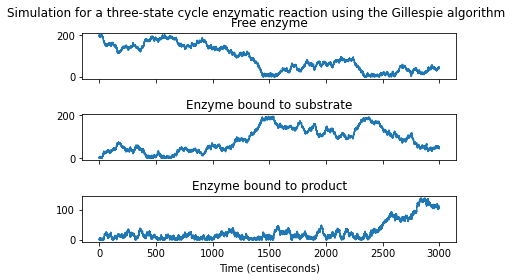

In [ ]:
n=200
E = [n]  #We give initial values for each state 
ES=[0]  
EP=[0]
t = [0]  

tend = 3000 #time in seconds

kplus = 10  #We set the transition rates we used hertz 
kminus = 1 

def tau():
    return (np.random.exponential(scale=1/rate_sum))

while t[-1] < tend:

        current_E = E[-1]
        current_ES = ES[-1]
        current_EP = EP[-1]
        

        rates = [kplus, kminus]
        rate_sum = sum(rates)

        
        rxn=random.randrange(0,3)
        
        if rxn ==0 and E[-1]>0:  #Do reaction on E
          rand = random.uniform(0,1)

          t.append(t[-1] + tau())

          # production event
          if rand * rate_sum >= 0 and rand * rate_sum < rates[0]:
                  E.append(E[-1] - 1)
                  ES.append(ES[-1]+1)
                  EP.append(EP[-1])

          # decay event
          elif rand * rate_sum >= rates[0] and rand * rate_sum < rates[0] + rates[1]:
                  E.append(E[-1] - 1)
                  EP.append(EP[-1]+1)
                  ES.append(ES[-1])
        
        if rxn ==1 and ES[-1]>0: #Do reaction on ES
          rand = random.uniform(0,1)

          t.append(t[-1] + tau())

          # production event
          if rand * rate_sum >= 0 and rand * rate_sum < rates[0]:
                  ES.append(ES[-1] - 1)
                  EP.append(EP[-1]+1)
                  E.append(E[-1])

          # decay event
          elif rand * rate_sum >= rates[0] and rand * rate_sum < rates[0] + rates[1]:
                  ES.append(ES[-1] - 1)
                  E.append(E[-1]+1)
                  EP.append(EP[-1])



        if rxn ==2 and EP[-1]>0: #Do reaction on EP
          rand = random.uniform(0,1)

          t.append(t[-1] + tau())

          # production event
          if rand * rate_sum >= 0 and rand * rate_sum < rates[0]:
                  EP.append(EP[-1] - 1)
                  E.append(E[-1]+1)
                  ES.append(ES[-1])

          # decay event
          elif rand * rate_sum >= rates[0] and rand * rate_sum < rates[0] + rates[1]:
                  EP.append(EP[-1] - 1)
                  ES.append(ES[-1]+1)
                  E.append(E[-1])

          

pE=E[-1]/n
pES=ES[-1]/n
pEP=EP[-1]/n
print(pE,pES,pEP)
fig, (ax1, ax2,ax3) = plt.subplots(3,sharex=True)
fig.suptitle('Simulation for a three-state cycle enzymatic reaction using the Gillespie algorithm')
ax1.plot(t,E)
ax1.set_title('Free enzyme')
ax2.plot(t,ES)
ax2.set_title('Enzyme bound to substrate')
ax3.plot(t,EP)
ax3.set_title('Enzyme bound to product')
ax3.set_xlabel('Time (centiseconds)')
fig.tight_layout(pad=1.6)
plt.show()

In [ ]:
def Gillespie(Einitial,cycles):
  def tau():
    return (np.random.exponential(scale=1/rate_sum))
  meanE=0
  meanEP=0
  meanES=0
  for i in range(cycles):
    n=Einitial
    E = [n]  #We give initial values for each state 
    ES=[0]  
    EP=[0]
    t = [0]  

    tend = 3*n**2 #time in seconds

    kplus = 10  #We set the transition rates we used hertz 
    kminus = 1 

    while t[-1] < tend:

            current_E = E[-1]
            current_ES = ES[-1]
            current_EP = EP[-1]
            

            rates = [kplus, kminus]
            rate_sum = sum(rates)

            

            rxn=random.randrange(0,3)
            
            if rxn ==0 and E[-1]>0:  #Do reaction on E
              rand = random.uniform(0,1)

              t.append(t[-1] + tau())

              # production event
              if rand * rate_sum >= 0 and rand * rate_sum < rates[0]:
                      E.append(E[-1] - 1)
                      ES.append(ES[-1]+1)
                      EP.append(EP[-1])

              # decay event
              elif rand * rate_sum >= rates[0] and rand * rate_sum < rates[0] + rates[1]:
                      E.append(E[-1] - 1)
                      EP.append(EP[-1]+1)
                      ES.append(ES[-1])
            
            if rxn ==1 and ES[-1]>0: #Do reaction on ES
              rand = random.uniform(0,1)

              t.append(t[-1] + tau())

              # production event
              if rand * rate_sum >= 0 and rand * rate_sum < rates[0]:
                      ES.append(ES[-1] - 1)
                      EP.append(EP[-1]+1)
                      E.append(E[-1])

              # decay event
              elif rand * rate_sum >= rates[0] and rand * rate_sum < rates[0] + rates[1]:
                      ES.append(ES[-1] - 1)
                      E.append(E[-1]+1)
                      EP.append(EP[-1])



            if rxn ==2 and EP[-1]>0: #Do reaction on EP
              rand = random.uniform(0,1)

              t.append(t[-1] + tau())

              # production event
              if rand * rate_sum >= 0 and rand * rate_sum < rates[0]:
                      EP.append(EP[-1] - 1)
                      E.append(E[-1]+1)
                      ES.append(ES[-1])

              # decay event
              elif rand * rate_sum >= rates[0] and rand * rate_sum < rates[0] + rates[1]:
                      EP.append(EP[-1] - 1)
                      ES.append(ES[-1]+1)
                      E.append(E[-1])

              

    pE=E[-1]/n
    pES=ES[-1]/n
    pEP=EP[-1]/n
    #print(pE,pES,pEP)
    meanE+=pE
    meanEP+=pEP
    meanES+=pES
  fmeanE=meanE/cycles
  fmeanEP=meanEP/cycles
  fmeanES=meanES/cycles
  print(fmeanE,fmeanEP,fmeanES)



In [ ]:
Gillespie(1,1000)


0.34 0.34 0.32


In [ ]:
Gillespie(15,1000)

0.3427999999999989 0.3262666666666656 0.3309333333333321


#Problem 5: Dynamics of a photoreceptor neuron
two-state continuous-time Markov process with time-dependent transition rates
\begin{equation}
    \nonumber 
    \omega_{21}(t)= \mu cos^{2}(\omega t)
\end{equation}

\begin{equation}
    \nonumber 
    \omega_{12}(t)= \mu sin^{2}(\omega t)
\end{equation}

##Plot
First we plot the transition rates for a given \mu and a frecuency. We double the frequency to analyze how the behaviour changes. 

In [ ]:
def w21(mu,omega,t): #We define both transition rates. 
  value=mu*np.cos(omega*t)
  return value

def w12(mu,omega,t):
  value=mu*np.sin(omega*t)
  return value


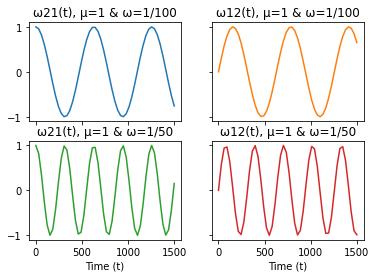

In [ ]:
t=np.linspace(0,1500) #we plot the for different values. 
y1=w21(1,1/100,t)
y2=w12(1,1/100,t)
y3=w21(1,1/50,t)
y4=w12(1,1/50,t)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(t, y1)
axs[0, 0].set_title('ω21(t), μ=1 & ω=1/100')
axs[0, 1].plot(t, y2, 'tab:orange')
axs[0, 1].set_title('ω12(t), μ=1 & ω=1/100')
axs[1, 0].plot(t, y3, 'tab:green')
axs[1, 0].set_title('ω21(t), μ=1 & ω=1/50')
axs[1, 1].plot(t, y4, 'tab:red')
axs[1, 1].set_title('ω12(t), μ=1 & ω=1/50')

for ax in axs.flat:
    ax.set(xlabel='Time (t)', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

##Derive analytical expressions for P1(t) and P2(t)
We now use the master equation to calculate the eigenvalues and eigenvectors using sympy

In [ ]:
mu, t , w = symbols('mu t w')
b=Matrix([[-mu*cos(w*t)**2,mu*sin(w*t)**2],[mu*cos(w*t)**2,-mu*sin(w*t)**2]])
b.eigenvects()

⎡⎛      ⎡⎡   2     ⎤⎤⎞  ⎛       ⎡⎡     2       ⎤⎤⎞⎤
⎢⎜      ⎢⎢sin (t⋅w)⎥⎥⎟  ⎜       ⎢⎢  sin (t⋅w)  ⎥⎥⎟⎥
⎢⎜      ⎢⎢─────────⎥⎥⎟  ⎜       ⎢⎢─────────────⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢   2     ⎥⎥⎟, ⎜-μ, 1, ⎢⎢   2         ⎥⎥⎟⎥
⎢⎜      ⎢⎢cos (t⋅w)⎥⎥⎟  ⎜       ⎢⎢cos (t⋅w) - 1⎥⎥⎟⎥
⎢⎜      ⎢⎢         ⎥⎥⎟  ⎜       ⎢⎢             ⎥⎥⎟⎥
⎣⎝      ⎣⎣    1    ⎦⎦⎠  ⎝       ⎣⎣      1      ⎦⎦⎠⎦